In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sabarirajn","key":"201bf89f3946d012bc6f6da2ffb6d573"}'}

In [ ]:
!wget https://images.rawpixel.com/image_png_800/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIzLTA4L3Jhd3BpeGVsX29mZmljZV8xMl9waG90b19vZl9nb2xkZW5fcmV0cmlldmVyX3B1cHB5X2p1bXBpbmdfaXNvbF83MTM2NGE2OS1kZTM0LTQzMWEtYWRkZS04ZTdmZWQ0ZGFiOTIucG5n.png

--2023-09-29 16:51:44--  https://images.rawpixel.com/image_png_800/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIzLTA4L3Jhd3BpeGVsX29mZmljZV8xMl9waG90b19vZl9nb2xkZW5fcmV0cmlldmVyX3B1cHB5X2p1bXBpbmdfaXNvbF83MTM2NGE2OS1kZTM0LTQzMWEtYWRkZS04ZTdmZWQ0ZGFiOTIucG5n.png
Resolving images.rawpixel.com (images.rawpixel.com)... 104.26.2.36, 104.26.3.36, 172.67.72.18, ...
Connecting to images.rawpixel.com (images.rawpixel.com)|104.26.2.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105488 (103K) [image/jpeg]
Saving to: ‘cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIzLTA4L3Jhd3BpeGVsX29mZmljZV8xMl9waG90b19vZl9nb2xkZW5fcmV0cmlldmVyX3B1cHB5X2p1bXBpbmdfaXNvbF83MTM2NGE2OS1kZTM0LTQzMWEtYWRkZS04ZTdmZWQ0ZGFiOTIucG5n.png’

cHJpdmF0ZS9sci9pbWF 100%[===================>] 103.02K  --.-KB/s    in 0.03s   

2023-09-29 16:51:44 (3.76 MB/s) - ‘cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIzLTA4L3Jhd3BpeGVsX29mZmljZV8xMl9waG90b19vZl9nb2xkZW5fcmV0cmlldmVyX3B1cHB5X2p1bXBpbmdfaXNvbF83MTM2NGE2OS1kZTM0LTQzMWEtY

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/4/48/RedCat_8727.jpg/1200px-RedCat_8727.jpg

--2023-09-29 16:51:56--  https://upload.wikimedia.org/wikipedia/commons/thumb/4/48/RedCat_8727.jpg/1200px-RedCat_8727.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238948 (233K) [image/jpeg]
Saving to: ‘1200px-RedCat_8727.jpg’

1200px-RedCat_8727. 100%[===================>] 233.35K  1.19MB/s    in 0.2s    

2023-09-29 16:51:57 (1.19 MB/s) - ‘1200px-RedCat_8727.jpg’ saved [238948/238948]



In [ ]:
import os

# Move the uploaded kaggle.json file to the appropriate location
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

# Check if the file is there
!ls /content


1200px-RedCat_8727.jpg
cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIzLTA4L3Jhd3BpeGVsX29mZmljZV8xMl9waG90b19vZl9nb2xkZW5fcmV0cmlldmVyX3B1cHB5X2p1bXBpbmdfaXNvbF83MTM2NGE2OS1kZTM0LTQzMWEtYWRkZS04ZTdmZWQ0ZGFiOTIucG5n.png
kaggle.json
sample_data


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 56% 605M/1.06G [00:21<00:16, 31.0MB/s]

In [ ]:
!unzip dogs-vs-cats.zip

unzip:  cannot find or open dogs-vs-cats.zip, dogs-vs-cats.zip.zip or dogs-vs-cats.zip.ZIP.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
#generators
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#create CNN model

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)   ))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'   ))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'   ))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
  1/625 [..............................] - ETA: 2:04:47 - loss: 0.6999 - accuracy: 0.4062

In [ ]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('cat.jpg')

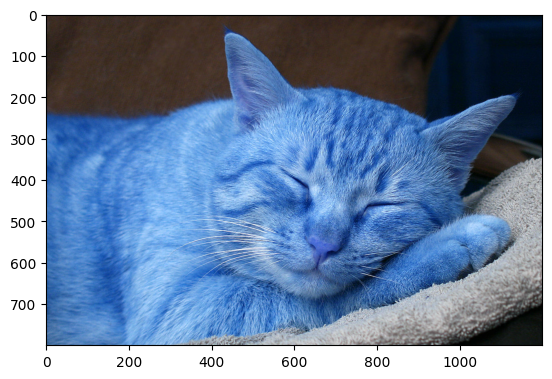

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(test_img)

In [ ]:
test_img.shape

(800, 1200, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

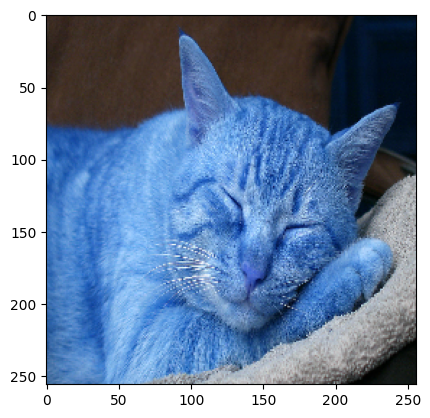

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(test_img)

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)

In [ ]:
!zip my_model.h5 mi_model.zip

	zip warning: missing end signature--probably not a zip file (did you
	zip warning: remember to use binary mode when you transferred it?)
	zip warning: (if you are trying to read a damaged archive try -F)

zip error: Zip file structure invalid (my_model.h5)
